# PRACTICE 1

## Problem 1


In [1]:
from sympy import dsolve, Eq, symbols, Function, solve, diff
from sympy.plotting import plot
from math import e
import pprint
pp = pprint.PrettyPrinter(indent=4)
t = symbols('t') #Declare the independent variable t
x = symbols ('x', cls=Function) #declare the dependent variable x(t)
dEq1 = Eq(x(t).diff(t),1-x(t)) #Define both left and right side in EQ
soldEq1 = dsolve(dEq1,x(t)) #Use dsolve to solve the EQ
print(soldEq1)

Eq(x(t), C1*exp(-t) + 1)


In [2]:
C1 = symbols('C1') #Declare constant C1 as symbolic
soldEq1RHS = soldEq1.rhs # Extract the right side of the EQ solution
soldEq1RHS_S = soldEq1RHS.subs({t : 0}) #substitute t for t=0 with the subs command
CI = 0 #CI value
CI_ic = solve(soldEq1RHS_S, C1)[0] #solve command to solve the constant C1
soldEq1_IC = soldEq1.subs({C1: CI_ic}) #replace C1 with the calculated IC subs
print(soldEq1_IC)

Eq(x(t), 1 - exp(-t))


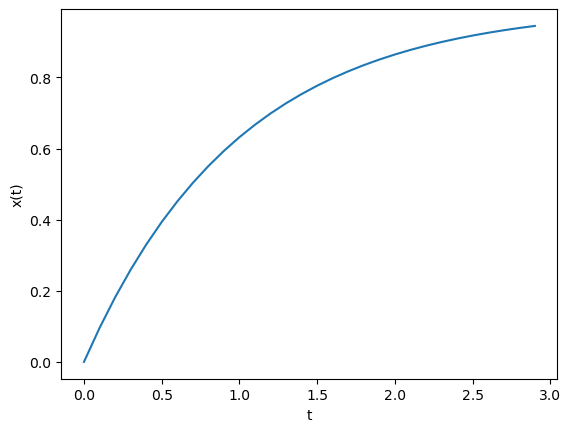

In [137]:
from matplotlib import pyplot as plt
import numpy as np
from sympy import lambdify

fSol = lambdify(t, soldEq1_IC.rhs, 'numpy') #convert Solution to a lambda
tvals = np.arange(0, 3, 0.1) #points between 0 and 3 with increment of 0.1

xvals = fSol(tvals) #Evaluate the points
plt.figure
plt.plot(tvals, xvals)
plt.xlabel('t') #t
plt.ylabel('x(t)') #x(t)
plt.show()

## Problem 2

In [4]:


t = symbols('t')
y = symbols ('y', cls=Function)
dEq2 = Eq(y(t).diff(t,t) + y(t).diff(t), e**(-t/2) - 4*y(t))
soldEq2 = dsolve(dEq2,y(t))
print(soldEq2)

Eq(y(t), 0.266666666666667*0.606530659712633**t + (C1*sin(1.93649167310371*t) + C2*cos(1.93649167310371*t))*exp(-0.5*t))


In [5]:
C1 = symbols('C1') #Declare C1 as var sym
C2 = symbols('C2') #Declare C2 as var sym
CI1 = 1 # IC 1
CI2 = 1 #IC2
p = soldEq2.rhs.diff(t) #derive the solution

C1_C2_ic = solve((soldEq2.rhs.subs({t:0})-CI1, p.subs({t:0})-CI2), C1, C2)#solve System substitute t for 0 in var C1 and C2
soldEq2_IC = soldEq2.subs({C1:C1_C2_ic[C1], C2:C1_C2_ic[C2]})
print(soldEq2_IC)

Eq(y(t), 0.266666666666667*0.606530659712633**t + (0.774596669241483*sin(1.93649167310371*t) + 0.733333333333333*cos(1.93649167310371*t))*exp(-0.5*t))


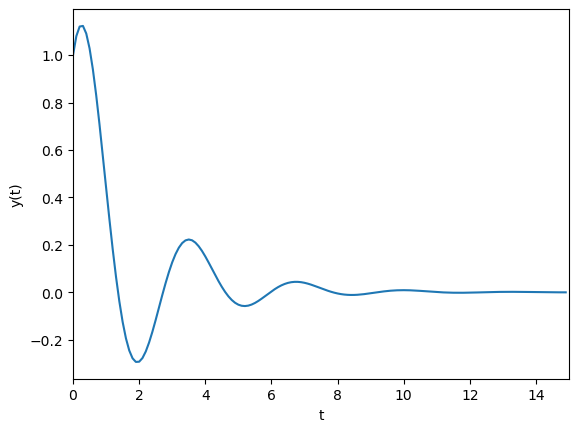

In [6]:
fSol = lambdify(t, soldEq2_IC.rhs, 'numpy')
tvals = np.arange(0, 15, 0.1)
yvals = fSol(tvals)
plt.figure
plt.plot(tvals, yvals)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.xlim(0,15)
plt.show()

EXERCISE 3

In [130]:
#1

from sympy import dsolve, Eq, symbols, Function, solve 
from sympy.plotting import plot
from matplotlib import pyplot as plt
import numpy as np
from sympy import lambdify
from math import e 
from sympy import sin, cos, diff, log
from scipy.integrate import odeint

def deqplot(eq,window=[-10,10]):
    
    difxlamb = lambdify(x, eq, 'numpy')
    xvals = np.arange(window[0], window[1], 0.1)
    difxvals = difxlamb(xvals)
    
    plt.figure()
    plt.plot(xvals, difxvals)
    plt.xlabel('x', fontweight='bold')
    plt.ylabel('difx', fontweight='bold')
    plt.title('Flow: ' + str(eq))
    plt.grid(True) 
    
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.xaxis.set_label_coords(0.5, -0.1)
   
    plt.show()
    

def fixed_point(eq):
    difx = eq
    fxp_calculation = solve([difx, 0])
    return fxp_calculation   


def stability(eq,window=[-10,10]):
    difx = eq
    difxlamb = lambdify(x, difx, 'numpy')
    xvals = np.arange(window[0], window[1], 0.1)
    difxvals = difxlamb(xvals)
    plt.figure
    plt.plot(xvals, difxvals)
    plt.xlabel('x',fontweight='bold')
    plt.ylabel('difx',fontweight='bold')
    plt.title('Stability: ' + str(difx))
    ax = plt.gca() 
   
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.xaxis.set_label_coords(0.5, -0.1)
    
    fxp_calculation = fixed_point(eq) #This returns a list of dictionaries 
    x_fxp = [] #List for adding x coordinates of the fxp
    
    for d in range(0, len(fxp_calculation)):
        dictionary = fxp_calculation[d][x] #We take the X coordinate from each dictionary 
        x_fxp.append(dictionary) #List with the X coordinate value. Now we study stability
    
    for value in x_fxp:
        if difx.subs({x:value - 0.01}) > 0:
            plt.plot(value - 0.5, 0, marker=">", color="black")
            if difx.subs({x:value + 0.01}) < 0:
                plt.plot(value + 0.5, 0, marker="<", color="black")
                plt.plot(value, 0, marker="o", color="r")
                print("stable:", value)
        if difx.subs({x:value - 0.01}) < 0:
            plt.plot(value - 0.5, 0, marker="<", color="black")
            if difx.subs({x:value + 0.01}) > 0:
                plt.plot(value + 0.5, 0, marker=">", color="black")
                plt.plot(value, 0, marker="o", color="red", mfc='w')
                print('unstable:', value)
    return plt.show()

def f1(x, y):
    difx1 = 4*x**2 - 16
    return difx1
def f2(x, y):
    difx2 = x - x**3
    return difx2
def f3(x, y):
    difx3 = e**(-x)*np.sin(x)
    return difx3
def f4(x, y):
    difx4 = 1 + (1/2)*np.cos(x)
    return difx4
def f5(x, y):
    difx5 = (-1+x)-np.log(1+x)
    return difx5
def f6(x, y):
    difx6 = (x/2) - (x/(1+x**2))
    return difx6


def analytical_sol(eq):
    difx = eq
    x = symbols('x', cls=Function)
    t = symbols('t')
    eq1 = Eq(x(t).diff(t), 4*(x(t)**2) - 16)
    eq2 = Eq(x(t).diff(t), x(t) - x(t)**3)
    eq3 = Eq(x(t).diff(t), e**(-x(t))*sin(x(t)))
    eq4 = Eq(x(t).diff(t), 1 + (1/2)*cos(x(t)))
    eq5 = Eq(x(t).diff(t), (-1+x(t))-log(1+x(t)))
    eq6 = Eq(x(t).diff(t), (x(t)/2) - (x(t)/(1+x(t)**2)))
    odes = [eq1, eq2, eq3, eq4, eq5, eq6]
    list_rhs = [eq1.rhs, eq2.rhs, eq3.rhs, eq4.rhs, eq5.rhs, eq6.rhs]

    for value in range(0, len(list_rhs)):
        eq_rhs = list_rhs[value]
        string = str(eq_rhs).replace('(t)','')
        if str(difx) == string:
            solution = dsolve(odes[value],x(t))
    return solution

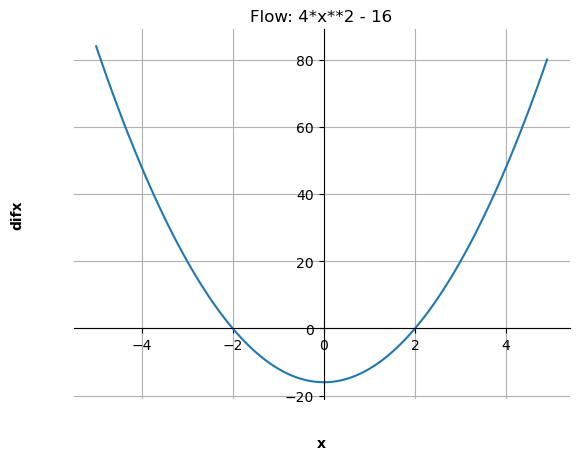

Fixed points: [{x: -2}, {x: 2}]
stable: -2
unstable: 2


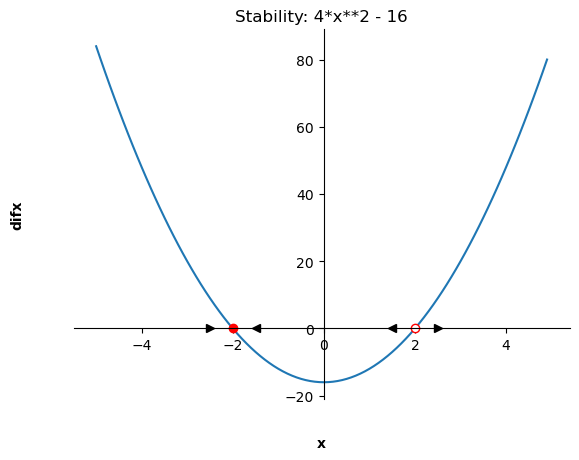

Analytical solution: Eq(x(t), 2/tanh(C1 - 8*t))


In [131]:

x = symbols('x', real=True) 
y = symbols('y')

difx = 4*(x**2) - 16
deqplot(difx,window=[-5,5])
print('Fixed points:', fixed_point(difx))
stability(difx,window=[-5,5])
print('Analytical solution:', analytical_sol(difx))






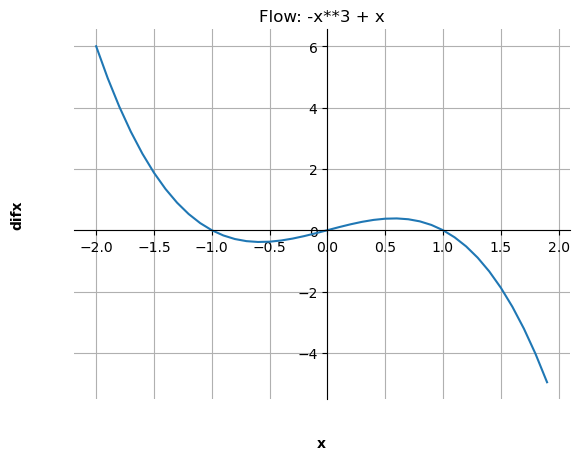

Fixed points: [{x: -1}, {x: 0}, {x: 1}]
stable: -1
unstable: 0
stable: 1


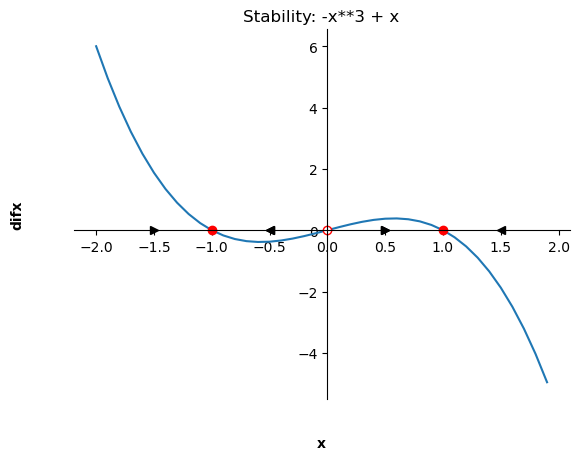

Analytical solution: [Eq(x(t), -sqrt(-exp(2*t)/(C1 - exp(2*t)))), Eq(x(t), sqrt(-exp(2*t)/(C1 - exp(2*t))))]


In [132]:
difx = x - x**3
deqplot(difx,window=[-2,2])
print('Fixed points:', fixed_point(difx))
stability(difx,window=[-2,2])
print('Analytical solution:', analytical_sol(difx))


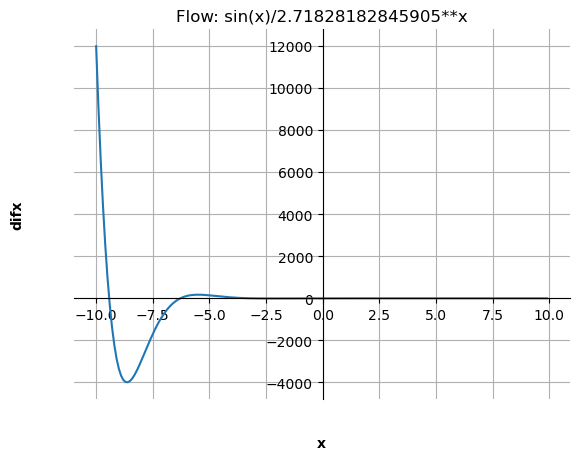

Fixed points: [{x: 0.0}, {x: 3.14159265358979}]
unstable: 0.0
stable: 3.14159265358979


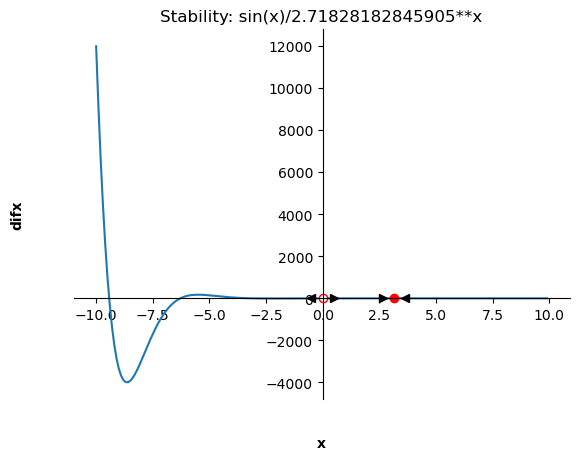

Analytical solution: Eq(Integral(1/(0.367879441171442**_y*sin(_y)), (_y, x(t))), C1 + t)


In [133]:

difx = e**(-x)*sin(x)
deqplot(difx)
print('Fixed points:', fixed_point(difx))
stability(difx)
print('Analytical solution:', analytical_sol(difx))

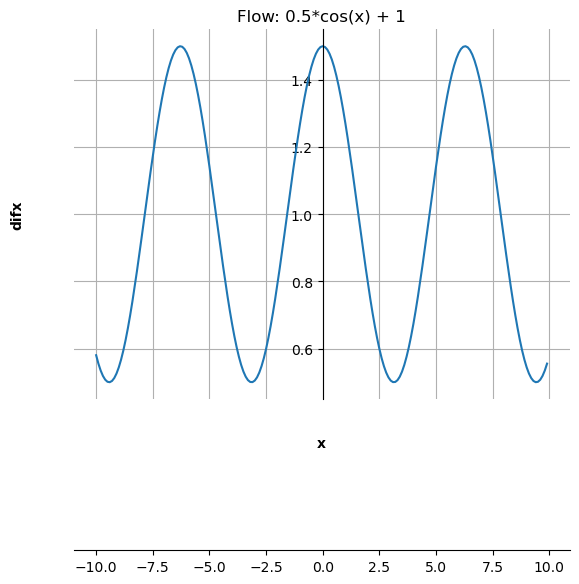

Fixed points: []


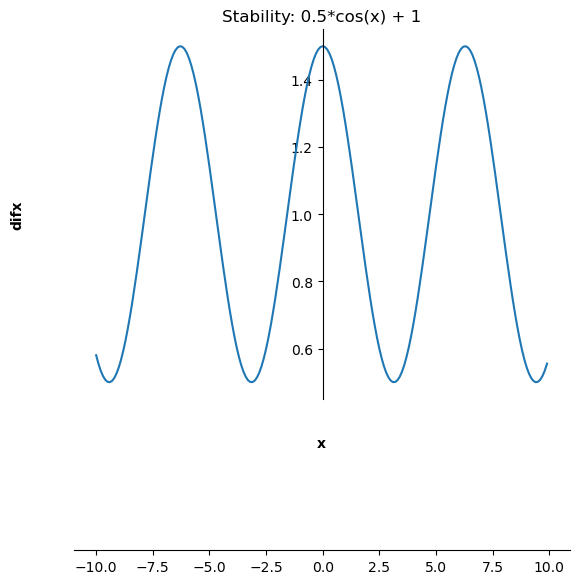

Analytical solution: Eq(-1.0*Integral(1/(0.5*cos(_y) + 1.0), (_y, x(t))), C1 - t)


In [106]:

difx = 1 + (1/2)*cos(x)
deqplot(difx)
print('Fixed points:', fixed_point(difx))
stability(difx)
print('Analytical solution:', analytical_sol(difx))

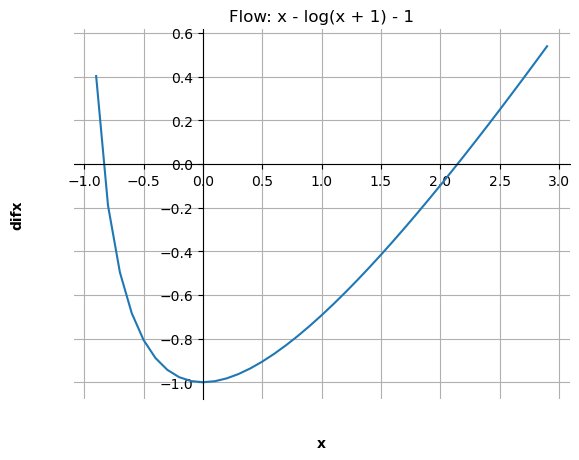

Fixed points: [{x: -1 - LambertW(-exp(-2))}, {x: -1 - LambertW(-exp(-2), -1)}]
stable: -1 - LambertW(-exp(-2))
unstable: -1 - LambertW(-exp(-2), -1)


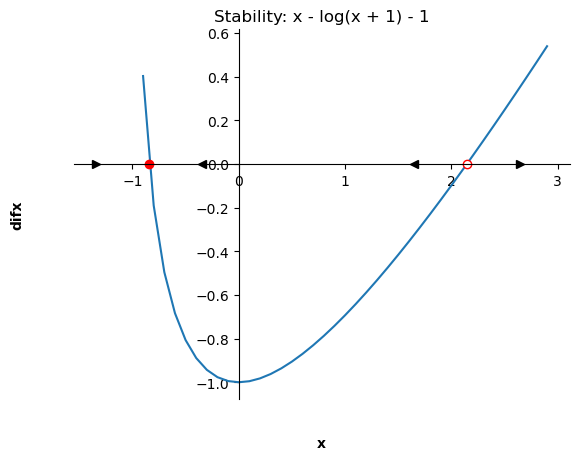

Analytical solution: Eq(-Integral(1/(_y - log(_y + 1) - 1), (_y, x(t))), C1 - t)


In [134]:

difx = (-1+x)-log(1+x)
deqplot(difx,window=[-0.9,3])
print('Fixed points:', fixed_point(difx))
stability(difx,window=[-0.9,3])
print('Analytical solution:', analytical_sol(difx))

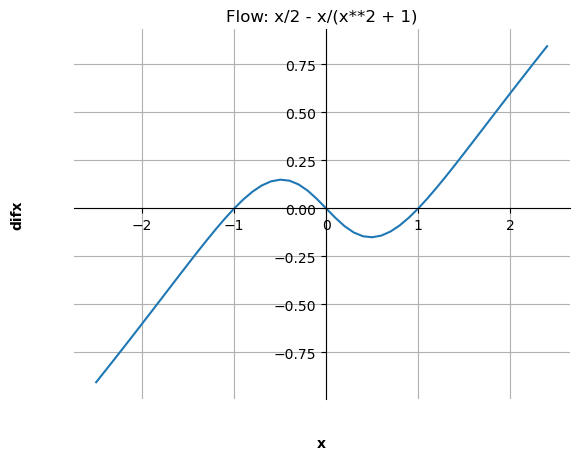

Fixed points: [{x: -1}, {x: 0}, {x: 1}]
unstable: -1
stable: 0
unstable: 1


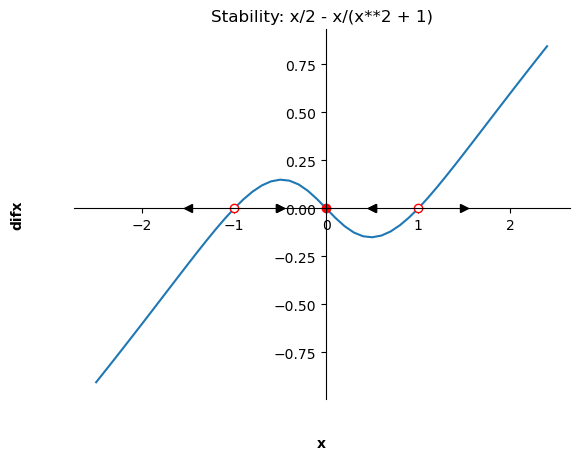

Analytical solution: [Eq(x(t), -sqrt(2)*sqrt(-sqrt(exp(2*t) + 4*exp(C1 + t))*exp(-C1) + exp(-C1 + t) + 2)/2), Eq(x(t), sqrt(2)*sqrt(-sqrt(exp(2*t) + 4*exp(C1 + t))*exp(-C1) + exp(-C1 + t) + 2)/2), Eq(x(t), -sqrt(2)*sqrt(sqrt(exp(2*t) + 4*exp(C1 + t))*exp(-C1) + exp(-C1 + t) + 2)/2), Eq(x(t), sqrt(2)*sqrt(sqrt(exp(2*t) + 4*exp(C1 + t))*exp(-C1) + exp(-C1 + t) + 2)/2)]


In [135]:

difx = (x/2) - (x/(1+x**2))
deqplot(difx,window=[-2.5,2.5])
print('Fixed points:', fixed_point(difx))
stability(difx,window=[-2.5,2.5])
print('Analytical solution:', analytical_sol(difx))

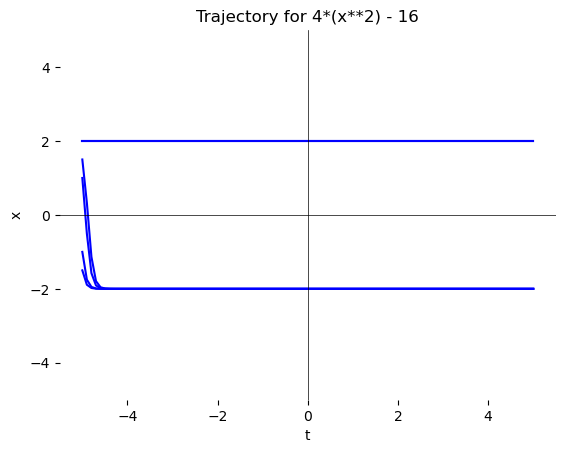

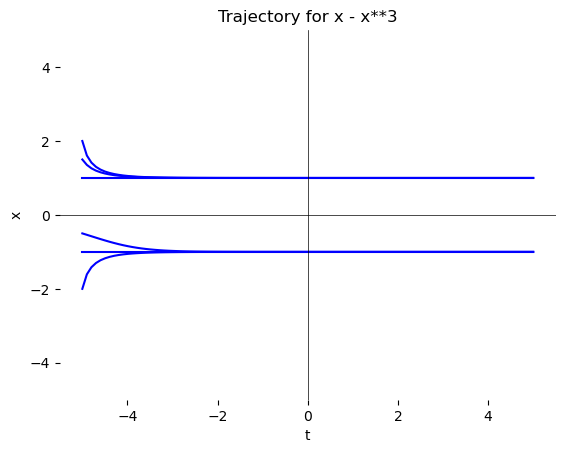

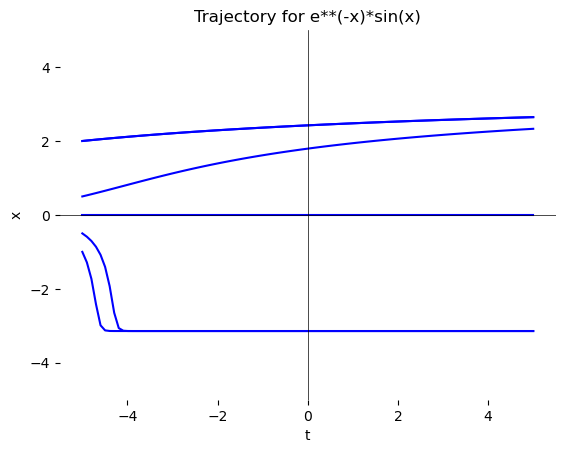

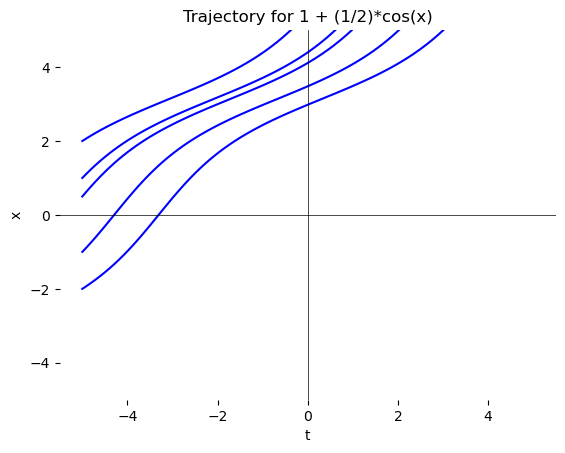

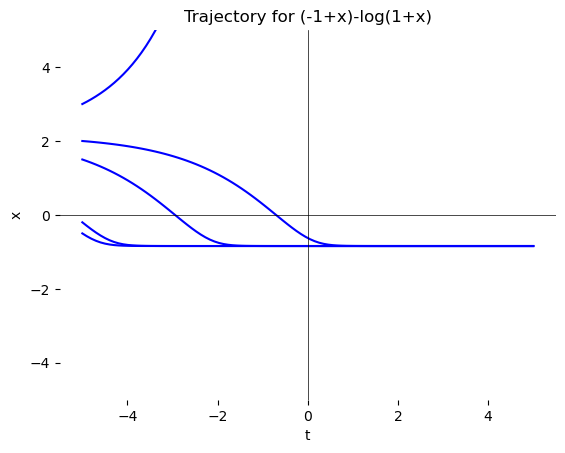

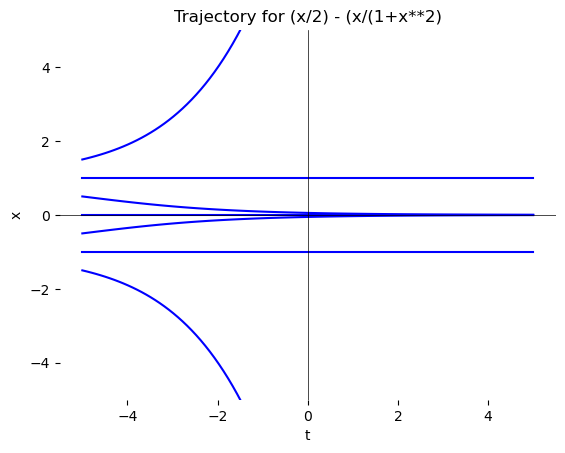

In [47]:
#trayectories
clist=[[2,1.5, 1, -1, -1.5,2],[2, 1.5,1, -1, -0.5, -2],[-0.5, 2, 0, -1, 0.5, 2],
       [0.5, 1, -1,2,-2],[-0.2, 2,1.5, 3,-0.5],[-1.5, 1.5, 0, 0.5, -0.5, 1, -1]]
eqlist=['4*(x**2) - 16','x - x**3','e**(-x)*sin(x)','1 + (1/2)*cos(x)','(-1+x)-log(1+x)','(x/2) - (x/(1+x**2)']
for num, cond in enumerate(clist, start=1):
    x = np.linspace(-5, 5, 100)
    for i in cond:
        sol = odeint(globals()[f'f{num}'], i, x)
        plt.plot(x, sol, 'b')
        plt.ylim(-5, 5)
    
    plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line for x-axis
    plt.axhline(0, color='black', linewidth=0.5)  # Add vertical line for y-axis
    
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title(f'Trajectory for {eqlist[num-1]}')
    
    plt.box(False)  # Remove plot border lines
    
    plt.show()


EXERCISE 4

In [123]:

t = symbols('t')
N = symbols ('N', cls=Function)
r = symbols ('r', positive=True) 
K = symbols ('K', positive=True) 
dEq4 = Eq(N(t).diff(t),r*N(t)*(1-(N(t)/K)))
soldph_eq = solve(dEq4.rhs, N(t)) #calculate the fixed points and printing
print(soldph_eq)
soldEq4 = dsolve(dEq4,N(t)) #solve the diffEq itself with C1 as a parameter
print(soldEq4)

[0, K]
Eq(N(t), K*exp(C1*K + r*t)/(exp(C1*K + r*t) - 1))


unstable: 0
stable: 1000


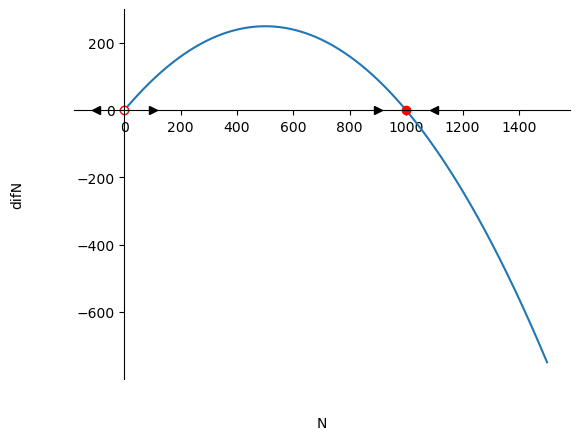

In [136]:
#2

r1 = 1
K1 = 1000

#k is fixed point

soldph_eq[1] = K1 


difdEq4 = dEq4.rhs.diff(N(t)).subs({r:r1, K:K1})

difxlamb = lambdify(N(t), dEq4.rhs.subs({r:r1, K:K1}), 'numpy')


xvals = np.arange(0,1500, 0.1)
difxvals = difxlamb(xvals)
plt.figure
plt.plot(xvals, difxvals)
plt.xlabel('N')
plt.ylabel('difN')

ax = plt.gca()  
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)
    

for i in soldph_eq:
    if difdEq4.subs({r:r1, K:K1}).subs(N(t),i) > 0:
        #when the derivate is bigger than 0 when substituting N by the
        #fixed points, we will know that it is unstable.
        print('unstable:', i)
        plt.plot(i,0, marker='o', mfc='w', mec='r')
        plt.plot(i-100, 0, marker = '<', color ='black')
        plt.plot(i+100, 0, marker = '>', color ='black')
    else:
        #if it is not unstable, it is stable, hence:
        print('stable:', i)
        plt.plot(i,0, marker='o', color='red')
        plt.plot(i-100, 0, marker = '>', color ='black')
        plt.plot(i+100, 0, marker = '<', color = 'black')
        
plt.show()

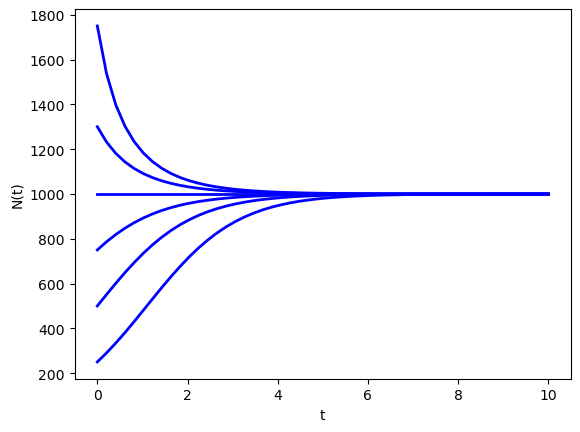

In [121]:
#3

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import tanh

def model(x,t):
    dxdt = x*(1-(x/1000))
    return dxdt

t = np.linspace(0,10)

x1 = odeint(model, 500, t)
x2 = odeint(model, 750, t)
x3 = odeint(model, 250, t)
x4 = odeint(model, 1300, t)
x5 = odeint(model, 1750, t)
x6 = odeint(model, 1000, t)

for n in [1,2,3,4,5,6]:
    plt.plot(t, globals()[f'x{n}'], 'b-', linewidth=2)

plt.xlabel('t')
plt.ylabel('N(t)')
plt.show()